# Predict Loan Eligibility for Dream Housing Finance company


### Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.


### Data Dictionary

### Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

#### Variable	Description
#### Loan_ID:                      	 Unique Loan ID
#### Gender:                         Male/ Female
#### Married:	                      Applicant married (Y/N)
#### Dependents:                 Number of dependents
#### Education:	                   Applicant Education (Graduate/ Under Graduate)
#### Self_Employed:	           Self employed (Y/N)
#### ApplicantIncome:         Applicant income
#### CoapplicantIncome :   Coapplicant income
#### LoanAmount	:              Loan amount in thousands
#### Loan_Amount_Term :	Term of loan in months
#### Credit_History	;           credit history meets guidelines
#### Property_Area ;	       Urban/ Semi Urban/ Rural
#### Loan_Status	;           (Target) Loan approved (Y/N)

### Test file: CSV containing the customer information for whom loan eligibility is to be predicted

#### Variable	Description
#### Loan_ID:                      	 Unique Loan ID
#### Gender:                         Male/ Female
#### Married:	                      Applicant married (Y/N)
#### Dependents:                 Number of dependents
#### Education:	                   Applicant Education (Graduate/ Under Graduate)
#### Self_Employed:	           Self employed (Y/N)
#### ApplicantIncome:         Applicant income
#### CoapplicantIncome :   Coapplicant income
#### LoanAmount	:              Loan amount in thousands
#### Loan_Amount_Term :	Term of loan in months
#### Credit_History	;           credit history meets guidelines
#### Property_Area ;	       Urban/ Semi Urban/ Rural


### Let us first Import all the necessary packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import random

#### Let us read our training dataset using the read_csv function from the pandas library

In [6]:
df = pd.read_csv("C:/Users/Daksha/Desktop/train_ctrUa4K.csv")

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#### Let us check out all the information we can get from our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Before we begin, let us drop the Loan_ID column since it will not help us in our prediction

In [10]:
df.drop('Loan_ID', axis=1,inplace=True)

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Let us check out how many null values are present in each column of our training dataset

In [12]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Let us handle all the null values one by one

In [13]:
df[df['Gender'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


#### We see above that the values missing are at random i.e they do not have any connection with values of the other columns 

#### Since there are relatively less Nan Values, We can simply fill them with the median value from the column

#### Let us check the unique values present in the Gender column

In [14]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

#### We see that the median is male, so let us now fill all the NaN values with Male

In [15]:
df['Gender'].fillna('Male', inplace=True )

In [16]:
df['Gender'].isnull().sum()

0

#### All the NaN values have been replaced with the median
#### Let's deal with the remaining ones

In [17]:
df[df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [18]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df[df['Dependents'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [20]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

### We see that there might be some relationship between the missing values of column 'Dependents' and 'Married i.e they are not missing at random

#### Before that we will remove the '+' sign from the value present as '3+' representing any value that is 3 or above it

In [21]:
df['Dependents'].replace(to_replace="3+",value="3", inplace=True)

In [22]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

#### According to Wikipedia, A dependent is a person who relies on another as a primary source of income. 
#### For example, minors (children who are under the age of majority) are dependants of their parents or legal guardians.
#### For someone to have minors as dependants, then they should have been married at some point

#### With respect to the above info, wherever the status of married is No, we will fill dependents as 0. 

#### Before that we will fill in null values of 'Married' with the median since there are only three null values present

In [23]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
df['Married'].fillna('Yes', axis=0, inplace=True)

In [25]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

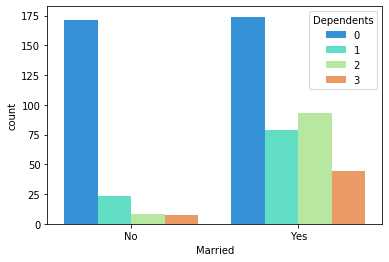

In [27]:
import seaborn as sns
sns.setstyle='whitegrid'
sns.countplot(data=df, x=df['Married'], hue=df['Dependents'], palette='rainbow')

#### From the above Countplot, it has been clearly understood that Married people have more Dependents when compared to unmarried people

#### Now let us define a function where we will fill value of dependents

#### If Married status is No, we fill dependents with 0
#### If Married status is Yes, we fill it with 1

In [28]:
def impute_dep(cols):
    Dependents=cols[0]
    Married=cols[1]
    
    if pd.isnull(Dependents):
        
        if Married=='No':
            return '0'
        else:
            return '1'
        
    else:
        return Dependents
        


#### Let us apply the function to our columns

In [29]:
df['Dependents'] = df[['Dependents', 'Married']].apply(impute_dep, axis=1)

In [30]:
df['Dependents'].isnull().sum()

0

#### Let us check for the column 571 which had a null value, it should be filled with 1 since the corresponding Married column was filled with Yes

In [31]:
df['Dependents'][571]

'1'

#### Our Function has been successfully implemented, let us check for other null values

In [32]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
df[df['Self_Employed'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


#### We try to see if the null values in Self_Employed has any relationship with values of other columns

#### We see that there might be some relationship in Education and Self_Employed which we can use in to fill the null values

In [34]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

#### Let us plot a countplot to see the relationship between Education and Self_Employment

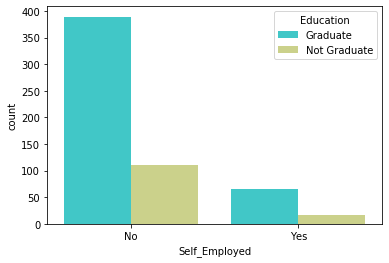

In [35]:
import seaborn as sns
sns.setstyle='whitegrid'
sns.countplot(data=df, x=df['Self_Employed'], hue=df['Education'], palette='rainbow')

#### We see that around 400 people who are Graduates are not self employed which implies that Graduates generally are not Self Employed

#### Again using a function, we will fill in null values with No if the person is a Graduate and vice-versa

In [36]:
def impute_self(cols):
    Self_Employed=cols[0]
    Education=cols[1]
    
    if pd.isnull(Self_Employed):
        
        if Education=='Graduate':
            return 'No'
        else:
            return 'Yes'
        
    else:
        return Self_Employed

In [37]:
df['Self_Employed'] = df[['Self_Employed', 'Education']].apply(impute_self, axis=1)

In [38]:
df['Self_Employed'].isnull().sum()

0

#### Let us give a quick check to see if the function has worked or not. Let us check at column 601 which must be filled with Yes

In [39]:
df['Self_Employed'][601]

'Yes'

#### Perfect so Let's move on to other columns with null values

In [40]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
df[df['LoanAmount'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,Male,Yes,1,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,Male,Yes,3,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


#### In general, Married people have more expenses and are liable for more LoanAmount

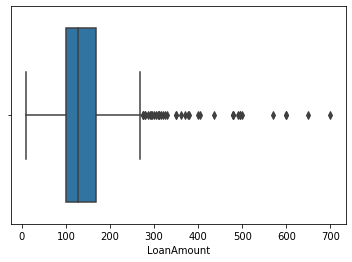

In [42]:
sns.boxplot(x=df['LoanAmount'])

#### If the person is married then we will set the corresponding null value of LoanAmount to around 75 percentile value

#### If the person is not married, then we will set the corresponding null value of LoanAmount to mean value

In [43]:
mean = df['LoanAmount'].mean()
mean

146.41216216216216

In [44]:
per = 180

In [45]:
def impute_Loan(cols):
    LoanAmount=cols[0]
    Married=cols[1]
    
    if pd.isnull(LoanAmount):
        
        if Married=='Yes':
            return per
        else:
            return mean
        
    else:
        return LoanAmount

In [46]:
df['LoanAmount'] = df[['LoanAmount', 'Married']].apply(impute_Loan, axis=1)

In [47]:
df['LoanAmount'].isnull().sum()

0

#### We have successfully replaced all the null values, we will just check it out

In [48]:
df['LoanAmount'][605]

180.0

#### Perfect, Let us next check for the rest 

In [49]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df[df['Loan_Amount_Term'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,Male,Yes,3,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [51]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

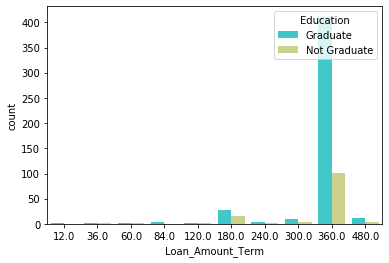

In [52]:
import seaborn as sns
sns.setstyle='whitegrid'
sns.countplot(data=df, x=df['Loan_Amount_Term'], hue=df['Education'], palette='rainbow')

#### We dont see any significant relationship between Education and Loan_Amount_Term

#### So we will just fill null values with median ie 360.0

In [53]:
median = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna(median, inplace=True)

In [54]:
df['Loan_Amount_Term'].isnull().sum()

0

#### Good so all null values are filled with median of Loan_Amount_Term

In [55]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
df[df['Credit_History'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.000000,240.0,NaN,Urban,Y
24,Male,Yes,1,Graduate,No,3717,2925.0,151.000000,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,No,4166,3369.0,201.000000,360.0,NaN,Urban,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.000000,360.0,NaN,Urban,Y
79,Male,Yes,3,Not Graduate,Yes,3333,2166.0,130.000000,360.0,NaN,Semiurban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.000000,360.0,NaN,Semiurban,N
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.000000,360.0,NaN,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,146.412162,360.0,NaN,Urban,N
117,Male,Yes,1,Graduate,No,2214,1398.0,85.000000,360.0,NaN,Urban,Y
125,Female,No,0,Graduate,No,3692,0.0,93.000000,360.0,NaN,Rural,Y


In [57]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

#### After checking for all the columns, we get that people with 0 dependents tend to have a credit score of 1.0. Let us use this criteria to fill in null values

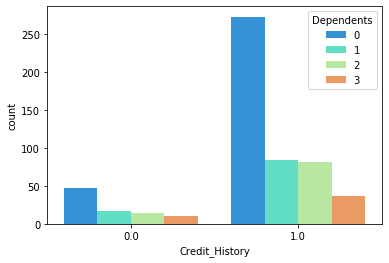

In [58]:
import seaborn as sns
sns.setstyle='whitegrid'
sns.countplot(data=df, x=df['Credit_History'],hue=df['Dependents'], palette='rainbow')

In [59]:
def impute_credit(cols):
    Credit_History=cols[0]
    Dependents=cols[1]
    
    if pd.isnull(Credit_History):
        
        if Dependents==0:
            return 1.0
        else:
            return 0.0
        
    else:
        return Credit_History

In [60]:
df['Credit_History'] = df[['Credit_History', 'Dependents']].apply(impute_credit, axis=1)

In [61]:
df['Credit_History'].isnull().sum()

0

#### So all the null values are filled up, let us move on towards encoding

#### Before that let us check if the dataset is imbalanced

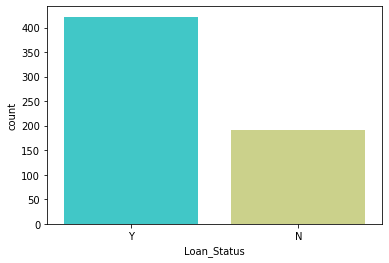

In [62]:
import seaborn as sns
sns.setstyle='whitegrid'
sns.countplot(data=df, x=df['Loan_Status'], palette='rainbow')

#### It is a balanced dataset so we can move forward with encoding

In [63]:
Y = df['Loan_Status']
df = pd.get_dummies(df.drop('Loan_Status', axis=1), drop_first=True)

In [64]:
from sklearn.preprocessing import RobustScaler
df = RobustScaler().fit_transform(df)
df

array([[ 0.69802913, -0.51735771,  0.24016775, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26409597,  0.13907933, -0.0137931 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27849186, -0.51735771, -0.86896552, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.45998286, -0.41288497,  1.71034483, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.29237361, -0.51735771,  0.8       , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26409597, -0.51735771,  0.05517241, ...,  1.        ,
         1.        ,  0.        ]])

#### Now we can begin with building our model

#### We will be using all types of classification models to check for highest accuracy

#### The model with the highest accuracy will be used for Hyperparameter Tuning to increase its accuracy again

In [65]:
X = df

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

#### Now we will use various Classification models one by one

In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### We will now check the accuracy score, precision, recall, confusion matrix etc of our model

In [69]:
Y_pred = log_reg.predict(X_test)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           N       0.59      0.35      0.44        37
           Y       0.76      0.90      0.82        86

    accuracy                           0.73       123
   macro avg       0.68      0.62      0.63       123
weighted avg       0.71      0.73      0.71       123

[[13 24]
 [ 9 77]]


In [70]:
log_reg.score(X_test,Y_test)

0.7317073170731707

### We get an accuracy of 78.86%

#### SImilarly let us use the rest of the classification algorithms

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
Y_pred2 = knn.predict(X_test)
print(classification_report(Y_test,Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))

              precision    recall  f1-score   support

           N       0.65      0.30      0.41        37
           Y       0.75      0.93      0.83        86

    accuracy                           0.74       123
   macro avg       0.70      0.61      0.62       123
weighted avg       0.72      0.74      0.71       123

[[11 26]
 [ 6 80]]


### Well KNN has a decent score of 76%

In [73]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [74]:
Y_pred3 = naive.predict(X_test)
print(classification_report(Y_test,Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))

              precision    recall  f1-score   support

           N       0.60      0.41      0.48        37
           Y       0.78      0.88      0.83        86

    accuracy                           0.74       123
   macro avg       0.69      0.64      0.65       123
weighted avg       0.72      0.74      0.72       123

[[15 22]
 [10 76]]


#### Here we get an accuracy of 75%

In [75]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)

C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
Y_pred4 = svm.predict(X_test)
print(classification_report(Y_test,Y_pred4))
print(confusion_matrix(Y_test, Y_pred4))

              precision    recall  f1-score   support

           N       0.70      0.38      0.49        37
           Y       0.78      0.93      0.85        86

    accuracy                           0.76       123
   macro avg       0.74      0.65      0.67       123
weighted avg       0.75      0.76      0.74       123

[[14 23]
 [ 6 80]]


#### We get an accuracy of 76% with SVM

#### Let's see if there is any luck with Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [78]:
Y_pred5 = tree.predict(X_test)
print(classification_report(Y_test,Y_pred5))
print(confusion_matrix(Y_test, Y_pred5))

              precision    recall  f1-score   support

           N       0.65      0.59      0.62        37
           Y       0.83      0.86      0.85        86

    accuracy                           0.78       123
   macro avg       0.74      0.73      0.73       123
weighted avg       0.78      0.78      0.78       123

[[22 15]
 [12 74]]


#### We are getting 76% accuracy 

#### Let us try with ensemble techniques

In [79]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,Y_train)

C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
Y_pred6 = forest.predict(X_test)
print(classification_report(Y_test,Y_pred6))
print(confusion_matrix(Y_test, Y_pred6))

              precision    recall  f1-score   support

           N       0.64      0.49      0.55        37
           Y       0.80      0.88      0.84        86

    accuracy                           0.76       123
   macro avg       0.72      0.69      0.70       123
weighted avg       0.75      0.76      0.75       123

[[18 19]
 [10 76]]


#### We are getting accuracy of 68% for random forest

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [82]:
Y_pred7 = ada.predict(X_test)
print(classification_report(Y_test,Y_pred7))
print(confusion_matrix(Y_test, Y_pred7))

              precision    recall  f1-score   support

           N       0.56      0.41      0.47        37
           Y       0.77      0.86      0.81        86

    accuracy                           0.72       123
   macro avg       0.66      0.63      0.64       123
weighted avg       0.71      0.72      0.71       123

[[15 22]
 [12 74]]


#### We are getting accuracy of 78%

In [83]:
import xgboost as xgb
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
Y_pred12 = xg_clf.predict(X_test)
print(classification_report(Y_test,Y_pred12))
print(confusion_matrix(Y_test, Y_pred12))

              precision    recall  f1-score   support

           N       0.56      0.49      0.52        37
           Y       0.79      0.84      0.81        86

    accuracy                           0.73       123
   macro avg       0.68      0.66      0.67       123
weighted avg       0.72      0.73      0.73       123

[[18 19]
 [14 72]]


### From all the above Models, let us try to use Hyper parameter techniques to increase the accuracy

#### Let us begin with random forest 

In [538]:
parameters = [{'criterion': ['gini','entropy'], 'max_depth' : [1,2,3,4,5,6,7,8,9,10], 'min_samples_split': [2,3,4,5,6,7,8,9,10],  'min_samples_leaf': [2,3,4,5,6,7,8,9,10]}]

In [539]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = forest, param_grid= parameters, scoring='accuracy', cv=10, n_jobs=-1 )
grid_search = grid_search.fit(X_train,Y_train)

C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [540]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [553]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini', max_depth=7, min_samples_leaf=2, min_samples_split=5)
forest.fit(X_train,Y_train)

C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [554]:
Y_pred8 = forest.predict(X_test)
print(classification_report(Y_test,Y_pred8))
print(confusion_matrix(Y_test, Y_pred8))

              precision    recall  f1-score   support

           N       0.50      0.36      0.42        28
           Y       0.83      0.89      0.86        95

    accuracy                           0.77       123
   macro avg       0.66      0.63      0.64       123
weighted avg       0.75      0.77      0.76       123

[[10 18]
 [10 85]]


#### Good, we are getting a better accuracy of 77%

#### Let us now take SVM

In [555]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
parameters = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0], 'kernel': ['rbf']} 

grid = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1) 

# fitting the model for grid search 
grid.fit(X_train, Y_train) 


C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.01,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [556]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [557]:
from sklearn.svm import SVC
svm = SVC(C=1000, gamma = 0.0001, kernel='rbf')
svm.fit(X_train,Y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [558]:
Y_pred9 = svm.predict(X_test)
print(classification_report(Y_test,Y_pred9))
print(confusion_matrix(Y_test, Y_pred9))

              precision    recall  f1-score   support

           N       0.48      0.54      0.51        28
           Y       0.86      0.83      0.84        95

    accuracy                           0.76       123
   macro avg       0.67      0.68      0.68       123
weighted avg       0.77      0.76      0.77       123

[[15 13]
 [16 79]]


#### We get a lower accuracy of 76%

#### Let us try with Logistic Regression

In [559]:
parameters2 = {'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 4, 20),
               'solver' : ['liblinear']}

In [560]:
grid = GridSearchCV(estimator=log_reg, param_grid=parameters2, scoring='accuracy', cv=10, n_jobs=-1) 
grid.fit(X_train,Y_train)

C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=0.23357214690901212,
                                          class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 

In [561]:
grid.best_params_

{'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}

In [562]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')
log_reg.fit(X_train,Y_train)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [563]:
Y_pred10 = log_reg.predict(X_test)
print(classification_report(Y_test,Y_pred10))
print(confusion_matrix(Y_test, Y_pred10))

              precision    recall  f1-score   support

           N       0.54      0.50      0.52        28
           Y       0.86      0.87      0.86        95

    accuracy                           0.79       123
   macro avg       0.70      0.69      0.69       123
weighted avg       0.78      0.79      0.79       123

[[14 14]
 [12 83]]


In [564]:
log_reg.score(X_test,Y_test)

0.7886178861788617

#### We get an accuracy of 78.8%

#### At last we will try with KNN

In [565]:
parameters3 = {'n_neighbors' : [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41],
               'weights' : ['uniform', 'distance'],
               'metric' : ['euclidean', 'manhattan']}

In [566]:
grid = GridSearchCV(estimator=knn, param_grid=parameters3, scoring='accuracy', cv=10, n_jobs=-1) 
grid.fit(X_train,Y_train)

C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [567]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [568]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='uniform')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [569]:
Y_pred11 = knn.predict(X_test)
print(classification_report(Y_test,Y_pred11))
print(confusion_matrix(Y_test, Y_pred11))

              precision    recall  f1-score   support

           N       0.33      0.32      0.33        28
           Y       0.80      0.81      0.81        95

    accuracy                           0.70       123
   macro avg       0.57      0.57      0.57       123
weighted avg       0.70      0.70      0.70       123

[[ 9 19]
 [18 77]]


#### We got an accuracy of 70%

In [ ]:
import xgboost as xgb
xg_clf = xgb.XGBClassifier()
xg_clf.fit(X_train,Y_train)

In [ ]:
Y_pred12 = xg_clf.predict(X_test)
print(classification_report(Y_test,Y_pred12))
print(confusion_matrix(Y_test, Y_pred12))

## So our best model turned out to be Logistic Regression with 78.8% accuracy

### Let us use this model to predict on our prediction dataset

In [85]:
df1 = pd.read_csv("C:/Users/Daksha/Desktop/test_lAUu6dG.csv")

In [86]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### WE have to do all the pre-processing just like we did for training dataset

In [87]:
df1.drop('Loan_ID', axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [88]:
df1['Dependents'].replace(to_replace="3+",value="3", inplace=True)

In [89]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [90]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [91]:
df1['Gender'].fillna('Male', inplace=True )

In [92]:
def impute_dep(cols):
    Dependents=cols[0]
    Married=cols[1]
    
    if pd.isnull(Dependents):
        
        if Married=='No':
            return '0'
        else:
            return '1'
        
    else:
        return Dependents

In [93]:
df1['Dependents'] = df1[['Dependents', 'Married']].apply(impute_dep, axis=1)

In [94]:
def impute_self(cols):
    Self_Employed=cols[0]
    Education=cols[1]
    
    if pd.isnull(Self_Employed):
        
        if Education=='Graduate':
            return 'No'
        else:
            return 'Yes'
        
    else:
        return Self_Employed

In [95]:
df1['Self_Employed'] = df1[['Self_Employed', 'Education']].apply(impute_self, axis=1)

In [96]:
mean1 = df1['LoanAmount'].mean()
mean1

136.13259668508286

In [97]:
per = 175

In [98]:
def impute_Loan(cols):
    LoanAmount=cols[0]
    Married=cols[1]
    
    if pd.isnull(LoanAmount):
        
        if Married=='Yes':
            return per
        else:
            return mean
        
    else:
        return LoanAmount

In [99]:
df1['LoanAmount'] = df1[['LoanAmount', 'Married']].apply(impute_Loan, axis=1)

In [100]:
median1 = df1['Loan_Amount_Term'].median()
df1['Loan_Amount_Term'].fillna(median, inplace=True)

In [101]:
def impute_credit(cols):
    Credit_History=cols[0]
    Dependents=cols[1]
    
    if pd.isnull(Credit_History):
        
        if Dependents==0:
            return 1.0
        else:
            return 0.0
        
    else:
        return Credit_History

In [102]:
df1['Credit_History'] = df1[['Credit_History', 'Dependents']].apply(impute_credit, axis=1)

In [103]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [104]:
df1.drop('Loan_ID', axis=1,inplace=True )

In [105]:
df1 = pd.get_dummies(df1, drop_first=True)
from sklearn.preprocessing import RobustScaler
df1 = RobustScaler().fit_transform(df1)
df1

array([[ 0.88069217, -0.42172393, -0.27118644, ...,  0.        ,
         0.        ,  1.        ],
       [-0.32331512,  0.19543304,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.55282332,  0.31886443,  1.38983051, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.24408015,  0.39827196,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.55282332,  0.56284715,  0.54237288, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.46539162, -0.42172393, -0.47457627, ...,  1.        ,
         0.        ,  0.        ]])

## After all the pre-processing, Let us now predict the target class

In [110]:
data = pd.DataFrame(tree.predict(df1))
data

,0
0,Y
1,N
2,Y
3,N
4,N
...,...
362,Y
363,Y
364,N
365,Y


## Our Logistic Regression with an accuracy of 78.8% has done it's predictions

In [111]:
path="C:/Users/Daksha/Desktop/SampleSubmission2.csv"
data.to_csv(path, index=False)